<a href="https://colab.research.google.com/github/Aditi840/Guvi-Tasks/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [27]:
df = pd.read_csv("car_data.csv")

In [28]:
print(df.columns)

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')


In [29]:
X = df['Mileage'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
#So the linear regression equation for mileage vs price is:
#Price = 34508.46 - 0.17*Mileage

Intercept: [24764.55900606]
Slope: [[-0.1725205]]


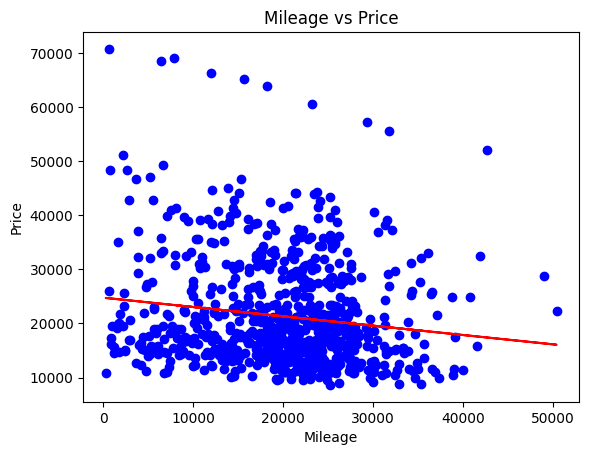

In [30]:
plt.scatter(X, y, color='blue')
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.show()

In [31]:
r2_score = model.score(X, y)
print("R2 Score:", r2_score)

R2 Score: 0.02046344732348926


In [32]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df['Price'].values.reshape(-1,1)
model.fit(X, y)


LinearRegression()

In [33]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [6758.7551436]
Coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [34]:
#So the linear regression equation for mileage, cylinders, liters, doors, cruise, sound, and leather is:
#Price = 6769.38 - 0.24*Mileage + 391.33*Cylinder - 3827.29*Liter - 1009.46*Doors + 613.19*Cruise - 167.28*Sound + 3764.39*Leather
r2_score = model.score(X, y)
print("R2 Score:", r2_score)

R2 Score: 0.446264353672838


In [35]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df['Price'].values.reshape(-1,1)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)
print("Ranking of features:", rfe.ranking_)

Ranking of features: [7 2 6 5 1 4 3]


In [36]:
#So, according to RFE, the combination of Cylinder and Mileage is the best predictor for price in this dataset.

In [46]:
# Create dummy variables for the categorical variables
make_dummies = pd.get_dummies(df['Make'], prefix='make')
model_dummies = pd.get_dummies(df['Model'], prefix='model')
body_type_dummies = pd.get_dummies(df['Type'], prefix='type')

# Combine the dummy variables with the numeric variables
X = pd.concat([df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']], make_dummies, model_dummies, body_type_dummies], axis=1)

# Define the dependent variable
y = df['Price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an instance of the Lasso model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Print the best combination of factors and the R2 score
print("Best combination of factors:", X.columns[model.coef_ != 0])
print("R2 score:", r2)

Best combination of factors: Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather',
       'make_Buick', 'make_Cadillac', 'make_Chevrolet', 'make_Pontiac',
       'make_SAAB', 'make_Saturn', 'model_9-2X AWD', 'model_9_3',
       'model_9_3 HO', 'model_9_5', 'model_9_5 HO', 'model_AVEO',
       'model_Bonneville', 'model_CST-V', 'model_CTS', 'model_Cavalier',
       'model_Century', 'model_Classic', 'model_Cobalt', 'model_Corvette',
       'model_Deville', 'model_G6', 'model_GTO', 'model_Grand Am',
       'model_Grand Prix', 'model_Impala', 'model_Ion', 'model_Lesabre',
       'model_Malibu', 'model_Monte Carlo', 'model_Park Avenue',
       'model_STS-V6', 'model_STS-V8', 'model_Sunfire', 'model_Vibe',
       'model_XLR-V8', 'type_Convertible', 'type_Coupe', 'type_Sedan',
       'type_Wagon'],
      dtype='object')
R2 score: 0.9754447829406064


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.207e+07, tolerance: 5.730e+06
  model = cd_fast.enet_coordinate_descent(
